In [1]:
from RCN import *
import numpy as np
import matplotlib.pyplot as plt
import json

In [171]:
# calibrated parameters from part_4.ipynb
r = -0.007801729853464256
delta = 0.02720239796079839
U = 1.054699999999994
D = 0.9440001342869291

### 1)
#### i)

In [314]:
payment_dates = np.arange(1,13)
period_length = 1/12
coupon_rate = 0.10
initial_price = 11118
exercise_price = 1

In [315]:
rcn1 = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, exercise_price, Simple=True, Callable=False, barrier_level=None)

In [316]:
rcn1.price_RCN()

1.0124083511877382

#### ii)

In [319]:
barrier_level = .8
rcn2 = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)

In [318]:
rcn2.set_barrier()
rcn2.price_RCN()

1.0124083511877382

### 2)

In [8]:
par_rate1 = 0
rcn1_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate1, exercise_price, Simple=True, Callable=False, barrier_level=None)
while np.abs(rcn1_par.price_RCN() - 1) > .001:
    par_rate1 += .001
    rcn1_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                           payment_dates, par_rate1, exercise_price, Simple=True, Callable=False, barrier_level=None)

In [9]:
par_rate1

0.08700000000000006

In [10]:
round(rcn1_par.price_RCN(),2)

1.0

In [11]:
par_rate2 = 0
rcn2_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate2, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)
rcn2_par.set_barrier()
while np.abs(rcn2_par.price_RCN() - 1) > .001:
    par_rate2 += .001
    rcn2_par = RCN_binomial(r, period_length, initial_price, delta, U, D,
                       payment_dates, par_rate2, exercise_price, Simple=False, Callable=False, barrier_level=barrier_level)
    rcn2_par.set_barrier()

In [12]:
par_rate2

0.04500000000000003

In [13]:
round(rcn2_par.price_RCN(),2)

1.0

In [14]:
barrier_levels = np.arange(.4,1.2,.2)
strikes = np.linspace(.5,1.5)

In [15]:
par_simple = []
par_barrier = {}

In [16]:
for s in strikes:
    par = -.10
    simple = RCN_binomial(r, period_length, initial_price, delta, U, D,
                          payment_dates, par, s, Simple=True, Callable=False, barrier_level=None)
    while np.abs(simple.price_RCN() - 1) > .001:
        par += .001
        simple = RCN_binomial(r, period_length, initial_price, delta, U, D,
                              payment_dates, par, s, Simple=True, Callable=False, barrier_level=None)
    par_simple.append(par)

In [17]:
"""
for b in barrier_levels:
    for s in strikes:
        print(b,s)
        par = -.10
        barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,
                  payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)
        barrier.set_barrier()
        while np.abs(barrier.price_RCN() - 1) > .001:
            par += .001
            barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,
                      payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)
            barrier.set_barrier()
        if s == strikes[0]:
            par_barrier[b] = [par]
        else:
            par_barrier[b].append(par)
"""

'\nfor b in barrier_levels:\n    for s in strikes:\n        print(b,s)\n        par = -.10\n        barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,\n                  payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)\n        barrier.set_barrier()\n        while np.abs(barrier.price_RCN() - 1) > .001:\n            par += .001\n            barrier = RCN_binomial(r, period_length, initial_price, delta, U, D,\n                      payment_dates, par, s, Simple=False, Callable=False, barrier_level=b)\n            barrier.set_barrier()\n        if s == strikes[0]:\n            par_barrier[b] = [par]\n        else:\n            par_barrier[b].append(par)\n'

In [18]:
# block above takes more time to execute, save output to avoid running again
"""
with open('par_barrier.json', 'w') as f:
    json.dump(par_barrier, f)
"""
f = open('par_barrier.json',)
par_barrier = json.load(f)

In [19]:
tick_loc = list(range(0,len(strikes)+1,9))
tick_lab = [round(strikes[i],2) for i in tick_loc]

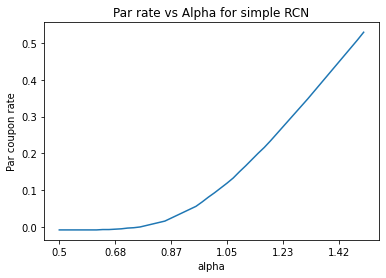

In [44]:
fig, ax = plt.subplots()
plt.plot(par_simple)
ax.set_xticks(tick_loc);
ax.set_xticklabels(tick_lab);
plt.xlabel('alpha');
plt.ylabel('Par coupon rate');
plt.title('Par rate vs Alpha for simple RCN');

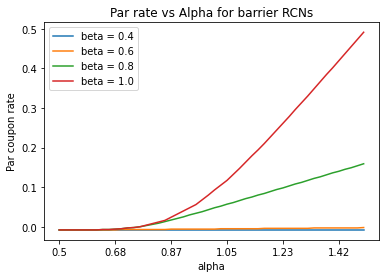

In [43]:
fig, ax = plt.subplots()
for i in range(len(par_barrier)):
    ax.plot(par_barrier[str(barrier_levels[i])], label = 'beta = '+str(round(barrier_levels[i],2)))
plt.legend()
ax.set_xticks(tick_loc);
ax.set_xticklabels(tick_lab);
plt.xlabel('alpha');
plt.ylabel('Par coupon rate');
plt.title('Par rate vs Alpha for barrier RCNs');

### 3)

In [120]:
a1 = 0
rcn1_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a1, Simple=True, Callable=False, barrier_level=None)
l = (rcn1_apar.price_RCN() - 1)**2
while np.sqrt(l) > .0001:
    grad = (rcn1_apar.price_RCN() - 1)*2
    a1 += .1 * grad
    rcn1_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a1, Simple=True, Callable=False, barrier_level=None)
    l = (rcn1_apar.price_RCN() - 1)**2

In [121]:
rcn1_apar.price_RCN()

1.0000996099062107

In [127]:
a1

1.0199301983798217

In [118]:
c_rates = np.linspace(0,.2,100)
a_pars = []
for c in c_rates:
    a_par = 0
    rcn1_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=True, Callable=False, barrier_level=None)
    # pseudo gradient descent with early stopping
    l = (rcn1_apar_c.price_RCN()-1)**2
    lr = .1
    while np.sqrt(l) > .0001:
        grad_out = 2*(rcn1_apar_c.price_RCN()-1)
        a_par += lr*grad_out
        rcn1_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=True, Callable=False, barrier_level=None)
        l = (rcn1_apar_c.price_RCN()-1)**2
    a_pars.append(a_par)

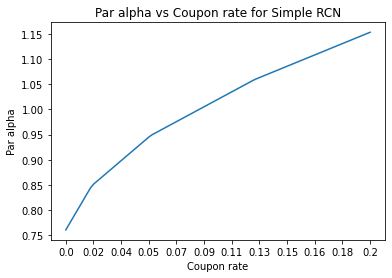

In [115]:
tick_loc = list(range(0,len(c_rates)+1,9))
tick_lab = [round(c_rates[i],2) for i in tick_loc]
fig, ax = plt.subplots()
plt.plot(a_pars)
ax.set_xticks(tick_loc);
ax.set_xticklabels(tick_lab);
plt.xlabel('Coupon rate');
plt.ylabel('Par alpha');
plt.title('Par alpha vs Coupon rate for Simple RCN');

### 4)

In [124]:
a2 = 0
rcn2_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a2, Simple=False, Callable=False, barrier_level=barrier_level)
rcn2_apar.set_barrier()
l = (rcn2_apar.price_RCN() - 1)**2
while np.sqrt(l) > .0001:
    grad = (rcn2_apar.price_RCN() - 1)*2
    a2 += .1 * grad
    rcn2_apar = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, coupon_rate, a2, Simple=False, Callable=False, barrier_level=barrier_level)
    rcn2_apar.set_barrier()
    l = (rcn2_apar.price_RCN() - 1)**2

In [125]:
rcn2_apar.price_RCN()

1.0000974476683058

In [126]:
a2

1.2392129118573822

In [556]:
c = 0.2
a_par = 33.5 # ajuster par tatonnement pour arriver à un prix un poil en dessous de 1
b = .6
bar = RCN_binomial(r, period_length, initial_price, delta, U, D, payment_dates, c, a_par, Simple=False, Callable=False, barrier_level=b)
bar.set_barrier()
bar.price_RCN()

0.9980588131015673

In [457]:
np.linspace(0,.2,6)

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 ])

In [565]:
x = np.array([[0,1.8],
[0.04,8.3],
[0.08,14.6],
[0.12,20.9],
[0.16,27.1],
[0.20,33.5]])

In [572]:
pf = np.polyfit(x[:,0],x[:,1],1)
# fit polynomial du 2ème degré pour initialiser valeur de départ pour alpha

In [574]:
# valeurs aberrantes de par alpha pour barrier avec beta = 0.6

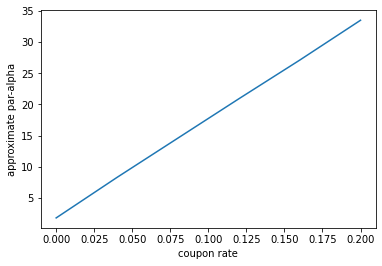

In [571]:
plt.plot(x[:,0],x[:,1]);
plt.xlabel('coupon rate');
plt.ylabel('approximate par-alpha');

In [ ]:
a_pars2 = {}

In [570]:
bar = np.delete(barrier_levels, 0)
b = barrier_levels[1]
#for b in bar:
for c in c_rates:
    print(b,c)
    a_par = pf[0]*(c**2) + pf[1]*c + pf[2]
    rcn2_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=False, Callable=False, barrier_level=b)
    rcn2_apar_c.set_barrier()
    # pseudo gradient descent with early stopping
    l = (rcn2_apar_c.price_RCN()-1)**2
    lr = .1
    while np.sqrt(l) > .0001:
        print(a_par)
        grad = (rcn2_apar_c.price_RCN()-1)*2
        a_par += lr*grad
        rcn2_apar_c = RCN_binomial(r, period_length, initial_price, delta, U, D,
                    payment_dates, c, a_par, Simple=False, Callable=False, barrier_level=b)
        rcn2_apar_c.set_barrier()
        l = (rcn2_apar_c.price_RCN()-1)**2
    if c == c_rates[0]:
        a_pars2[b] = [a_par]
    else:
        a_pars2[b].append(a_par)

0.6000000000000001 0.0
1.8464285714285777
1.8463707760520396
1.8463130546232134
1.846255407047485
1.8461978332303615
1.8461403330774704
1.84608290649456
1.8460255533874999
1.8459682736622791
1.8459110672250076
1.8458539339819156
1.8457968738393526
1.8457398867037886
1.845682972481813
1.8456261310801343
1.8455693624055813
1.8455126663651014
1.845456042865761
1.8453994918147454
1.845343013119359
1.845286606687025
1.8452302724252843
1.8451740102417964
1.845117820044339
1.845061701740808
1.8450056552392167
1.8449496804476966
1.8448937772744964
1.8448379456279822
1.8447821854166375
1.8447264965490628
1.8446708789339756
1.8446153324802104
1.8445598570967177
1.844504452692565
1.844449119176936
1.844393856459131
1.8443386644485655
1.8442835430547717
1.844228492187397
1.844173511756205
1.844118601671074
1.8440637618419982
1.8440089921790868
1.8439542925925638
1.8438996629927686
1.8438451032901546
1.8437906133952904
1.8437361932188585
1.8436818426716561
1.8436275616645945
1.8435733501086986
1.84

KeyboardInterrupt: 

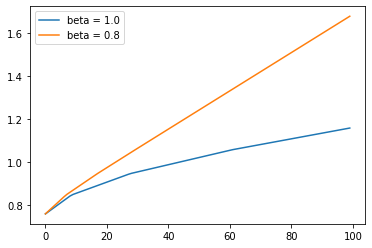

In [494]:
plt.plot(a_pars2[barrier_levels[3]], label = 'beta = '+str(round(barrier_levels[3],2)));
plt.plot(a_pars2[barrier_levels[2]], label = 'beta = '+str(round(barrier_levels[2],2)));
plt.legend();